In [ ]:
'''
Keras activation function
https://keras.io/api/layers/activations/

Keras optimizer
https://keras.io/api/optimizers/

Keras loss function
https://keras.io/api/losses/

Keras metrics(calculate score)
https://keras.io/api/metrics/
'''

In [1]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Using MNIST Fashion Dataset
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images.shape

(60000, 28, 28)

In [3]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [5]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [6]:
#Scale down 0~255 values to 0~1 for faster processing
train_images=train_images/255
test_images=train_images/255
train_images[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

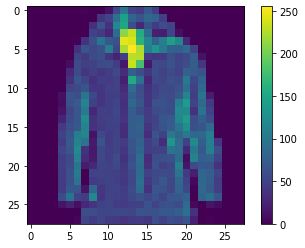

Coat


In [6]:
class_names=['T-shirt','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']

def show_image(mydata, mydata_label, n):
    #n = index of train data
    plt.figure()#new image/figure
    plt.imshow(mydata[n])
    plt.colorbar()#color bar
    plt.grid(False)#no grid
    plt.show()
    print(class_names[mydata_label[n]])
    
show_image(train_images, train_labels, 19)

In [37]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [38]:
#Training model
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 8.7248 - accuracy: 0.6670
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6863 - accuracy: 0.7502
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5938 - accuracy: 0.7849
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5492 - accuracy: 0.8045
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5307 - accuracy: 0.8160
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4975 - accuracy: 0.8277
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4918 - accuracy: 0.8316
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4741 - accuracy: 0.8394
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4710 - accuracy: 0.8373
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.474

In [39]:
#class_names[np.argmax(model.predict(test_images)[n])]
#class_names[np.argmax(model.predict(test_images[n].reshape(1,28,28)))]

def predict(n):
    show_image(test_images, test_labels, n)
    print('Prediction is '+class_names[np.argmax(model.predict(test_images[n].reshape(-1,28,28)))])

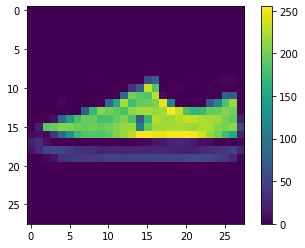

Sneaker
Prediction is Sneaker


In [40]:
predict(189)

In [41]:
#first value=loss, second value=accuracy
model.evaluate(test_images,test_labels,verbose=1)

313/313 [==============================] - 0s 1ms/step - loss: 0.5302 - accuracy: 0.8360


[0.5302492380142212, 0.8360000252723694]